In [77]:
import _pickle as cp
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessin 

In [78]:
# Load dataset 
X,y = cp.load(open('winequality-white.pickle', 'rb'))

# Split into training and test
N, D = X.shape
NTrain = int(0.8*N)
NTest = N - NTrain 
XTrain = X[:NTrain]
yTrain = y[:NTrain]
XTest = X[NTrain:]
yTest = y[NTrain:]

Text(0.5, 0.98, 'Distribution of Wine Quality')

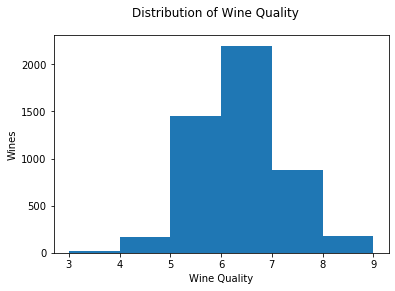

In [79]:
# Visualize distribution of y 
binMin = 3
binMax = 9
bins = np.linspace(binMin, binMax, binMax - binMin + 1)
plt.figure()
plt.hist(y, bins)
plt.xlabel('Wine Quality')
plt.ylabel('Wines')
plt.suptitle('Distribution of Wine Quality')

In [81]:
# Calculate baseline mean square error 
yAvg = np.mean(y)
baselineMSE = np.mean(np.square(y - yAvg))
print("Baseline MSE: " + str(baselineMSE))

Baseline MSE: 0.78419554751975


In [168]:
# Linear Model Using Least Squares 
# Standardize data
XTrainAvg = np.mean(XTrain, axis=0)
XTestAvg = np.mean(XTest, axis=0)
XTrainMeanShift = XTrain - XTrainAvg
XTestMeanShift = XTest - XTestAvg
XTrainStandardized = XTrainMeanShift / np.std(XTrainMeanShift, axis=0)
XTestStandardized = XTestMeanShift / np.std(XTestMeanShift,axis=0)

x0 = np.array([np.ones(XTrainStandardized.shape[0])]).T
XTrainStandardized = np.concatenate((x0, XTrainStandardized), axis=1)

x0Test = np.array([np.ones(XTestStandardized.shape[0])]).T
XTestStandardized = np.concatenate((x0Test, XTestStandardized), axis=1)

# Training 
XT = XTrainStandardized.T
XTX = np.dot(XT, XTrainStandardized)
XTXInv = np.linalg.inv(XTX)
XTXInvXT = np.dot(XTXInv,XT)
w = np.dot(XTXInvXT, yTrain)
yTrainPred = np.dot(XTrainStandardized,w)

# Training MSE 
trainMSE = np.mean(np.square(yTrainPred - yTrain))
print("Train MSE: " + str(trainMSE))

# Test MSE
yTestPred = np.dot(XTestStandardized,w)
testMSE = np.mean(np.square(yTestPred - yTest))
print("Test MSE: " + str(testMSE))

Train MSE: 0.5639996173941925
Test MSE: 0.5620667306625963


Text(0.5, 0.98, 'Learning Curve')

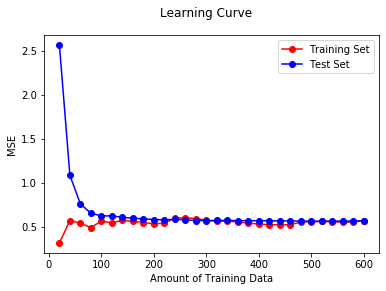

In [212]:
# Learning curves 
dataSizes = np.arange(20, 620, 20)
trainMSEs = []
testMSEs = []
for i in range(0, len(dataSizes)):
    subsetXTrain = XTrainStandardized[:dataSizes[i]]
    subsetyTrain = yTrain[:dataSizes[i]]
    XT = subsetXTrain.T
    XTX = np.dot(XT, subsetXTrain)
    XTXInv = np.linalg.inv(XTX)
    XTXInvXT = np.dot(XTXInv,XT)
    w = np.dot(XTXInvXT, subsetyTrain)
    
    yTrainPred = np.dot(subsetXTrain, w)
    trainMSE = np.mean(np.square(yTrainPred - subsetyTrain))
    trainMSEs.append(trainMSE)
    # Test MSE 
    yTestPred = np.dot(XTestStandardized,w)
    testMSE = np.mean(np.square(yTestPred - yTest))
    testMSEs.append(testMSE)
    
plt.figure()
plt.plot(dataSizes, trainMSEs, "-o", color="red", label="Training Set")
plt.plot(dataSizes, testMSEs, "-o", color="blue", label="Test Set")
plt.xlabel("Amount of Training Data")
plt.ylabel("MSE")
plt.legend()
plt.suptitle("Learning Curve")

In [ ]:
: